In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [39]:
books = pd.read_csv(r'D:\Books-Recommendation-System\data\books.csv', low_memory=False)
users = pd.read_csv(r'D:\Books-Recommendation-System\data\users.csv')
ratings = pd.read_csv(r'D:\Books-Recommendation-System\data\ratings.csv')

In [40]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [41]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [42]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [43]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [44]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [45]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [46]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [47]:
books.duplicated().sum()

np.int64(0)

In [48]:
ratings.duplicated().sum()

np.int64(0)

In [49]:
users.duplicated().sum()

np.int64(0)

In [50]:
# Drop rows with missing 'Book-Title', 'Book-Author', or 'Publisher'
books = books.dropna(subset=['Book-Title', 'Book-Author', 'Publisher'])

In [51]:
# Fill missing Age values with median
users['Age'] = users['Age'].fillna(users['Age'].median())

In [52]:
# Remove users with invalid ages
users = users[(users['Age'] > 5) & (users['Age'] < 100)]

In [53]:
# Remove 0-ratings
ratings = ratings[ratings['Book-Rating'] > 0]

## Visual EDA

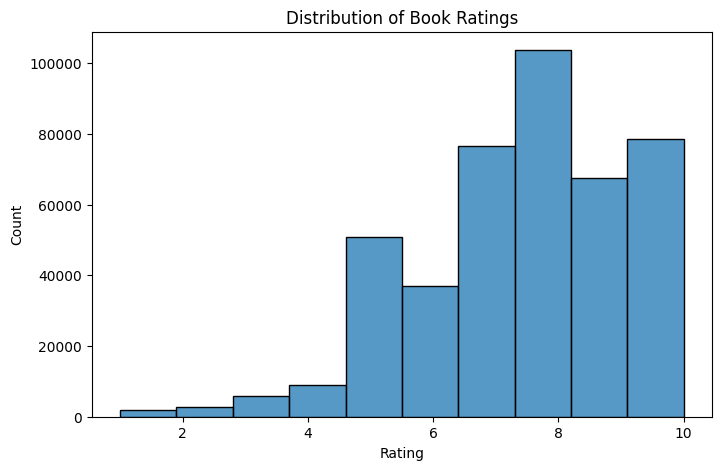

In [54]:
# Plot distribution of ratings
plt.figure(figsize=(8,5))
sns.histplot(ratings['Book-Rating'], bins=10, kde=False)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

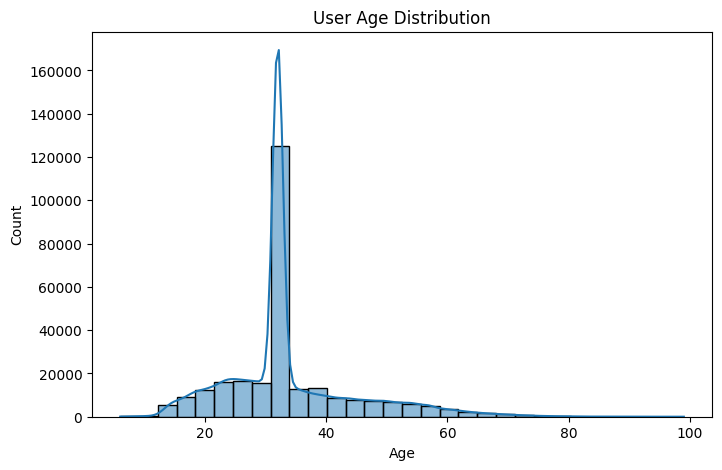

In [55]:
# Plot age distribution of users
plt.figure(figsize=(8,5))
sns.histplot(users['Age'], bins=30, kde=True)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [56]:
# Top 10 most rated books
top_rated = ratings['ISBN'].value_counts().head(10)
top_books = books[books['ISBN'].isin(top_rated.index)]
print("\nTop 10 Most Rated Books:")
print(top_books[['Book-Title', 'Book-Author', 'ISBN']])


Top 10 Most Rated Books:
                                             Book-Title    Book-Author  \
26                                          Wild Animus   Rich Shapero   
305                                     A Painted House   John Grisham   
356                             The Secret Life of Bees  Sue Monk Kidd   
408                           The Lovely Bones: A Novel   Alice Sebold   
522                 The Red Tent (Bestselling Backlist)  Anita Diamant   
706   Where the Heart Is (Oprah's Book Club (Paperba...   Billie Letts   
748                                   The Da Vinci Code      Dan Brown   
1105    Divine Secrets of the Ya-Ya Sisterhood: A Novel  Rebecca Wells   
2143  Harry Potter and the Sorcerer's Stone (Harry P...  J. K. Rowling   

            ISBN  
26    0971880107  
305   044023722X  
356   0142001740  
408   0316666343  
522   0312195516  
706   0446672211  
748   0385504209  
1105  0060928336  
2143  059035342X  


## Popularity Based Recommendation System


In [57]:
ratings_with_name = ratings.merge(books,on='ISBN')
print("\nRatings with Book Titles:")
print(ratings_with_name.head())


Ratings with Book Titles:
   User-ID        ISBN  Book-Rating  \
0   276726  0155061224            5   
1   276729  052165615X            3   
2   276729  0521795028            6   
3   276744  038550120X            7   
4   276747  0060517794            9   

                                          Book-Title    Book-Author  \
0                                   Rites of Passage     Judith Rae   
1                                     Help!: Level 1  Philip Prowse   
2  The Amsterdam Connection : Level 4 (Cambridge ...    Sue Leather   
3                                    A Painted House   JOHN GRISHAM   
4                           Little Altars Everywhere  Rebecca Wells   

  Year-Of-Publication                   Publisher  \
0                2001                      Heinle   
1                1999  Cambridge University Press   
2                2001  Cambridge University Press   
3                2001                   Doubleday   
4                2003                 HarperTo

In [58]:
# Rating count per book
num_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].count().reset_index()
num_rating_df.rename(columns={'Book-Rating': 'num_ratings'}, inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
135559,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
135560,Ã?Â?rger mit Produkt X. Roman.,3
135561,Ã?Â?sterlich leben.,1
135562,Ã?Â?stlich der Berge.,1


In [59]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
135559,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
135560,Ã?Â?rger mit Produkt X. Roman.,7.000000
135561,Ã?Â?sterlich leben.,7.000000
135562,Ã?Â?stlich der Berge.,8.000000


In [60]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
135559,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
135560,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
135561,Ã?Â?sterlich leben.,1,7.000000
135562,Ã?Â?stlich der Berge.,1,8.000000


In [61]:
popular_df = popular_df[popular_df['num_ratings'] >= 50]

In [62]:
popular_df = popular_df.sort_values('avg_rating', ascending=False).head(50)

In [63]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [64]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0345339711.01.MZZZZZZZ.jpg'

In [65]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,136,9.330882
11,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339738.0...,103,9.213592
21,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,247,9.125506
23,The Hobbit,J. R. R. Tolkien,http://images.amazon.com/images/P/0345272579.0...,50,9.120000
35,The Little Prince,Antoine de Saint-ExupÃ©ry,http://images.amazon.com/images/P/0156528207.0...,90,9.111111
40,Charlotte's Web (Trophy Newbery),E. B. White,http://images.amazon.com/images/P/0064400557.0...,68,9.073529
41,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,176,9.062500
45,84 Charing Cross Road,Helene Hanff,http://images.amazon.com/images/P/0860074382.0...,61,9.049180
48,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,211,9.047393
52,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,277,9.043321


## Collaborative Filtering Based Recommender System


In [73]:
# Users with more than 50 ratings
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 50
padhe_likhe_users = x[x].index

In [74]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [75]:
# Books with at least 10 ratings (instead of 50)
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 10
famous_books = y[y].index

In [76]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [77]:
# Pivot table
pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
pt.fillna(0, inplace=True)

In [78]:
pt

User-ID,254,638,1424,1733,1903,2033,2110,2276,2766,2891,...,274004,274061,274111,274301,275970,276680,277427,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2061: Odyssey Three,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,9.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong to Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yukon Ho!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
print(filtered_rating.shape)
print(final_ratings.shape)
print(pt.shape)

(151921, 10)
(32276, 10)
(1697, 1128)


In [79]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pt)

In [80]:
similarity_scores = cosine_similarity(pt)

In [82]:
# Recommend function
def recommend(book_name):
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:11]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        data.append(item)
    
    return data


In [94]:
from IPython.display import HTML, display

def recommend(book_name):
    # index fetch
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]

    html = '<div style="display:flex; gap:15px;">'

    for i in similar_items:
        temp_df = books[books['Book-Title'] == pt.index[i[0]]].drop_duplicates('Book-Title')
        title = temp_df['Book-Title'].values[0]
        author = temp_df['Book-Author'].values[0]
        image = temp_df['Image-URL-M'].values[0]

        # Directly use the image without checking
        html += f'''
        <div style="text-align:center; width:120px;">
            <img src="{image}" style="width:120px; height:180px; object-fit:cover; border-radius:8px;"><br>
            <span style="font-size:12px;"><b>{title}</b></span><br>
            <span style="font-size:11px; color:gray;">{author}</span>
        </div>
        '''

    html += '</div>'
    display(HTML(html))


recommend('Wild Animus')